In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

pd.set_option('display.max_columns', 500)

In [4]:
with open('parking_data.pickle','rb') as read_file:
    data = pickle.load(read_file)

In [5]:
data.head()

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,notice_number,hearing_disposition,officer,normalized_address,year,month,hour,ward,tract_id,blockgroup_geoid,community_area_number,community_area_name,geocode_accuracy,geocode_accuracy_type,geocoded_address,geocoded_lng,geocoded_lat
0,35125343,2001-03-02 18:50:00,2551 W DEVON,b1179a3c9992b7985db5ebe39d9e507c6c6e573e6ed332...,IL,PAS,000000000,0964100C,BLOCK ACCESS/ALLEY/DRIVEWAY/FIRELANE,16,CPD,SATR,50,100,0.0,50.0,Paid,2001-03-09 00:00:00,NaN,0,NaN,12511,"2500 w devon, Chicago, IL",2001,3,18,50.0,20602.0,1.703102e+11,2.0,WEST RIDGE,1.0,rooftop,"2500 W Devon Ave, Chicago, IL 60659",-87.692567,41.997949
1,32807228,2000-09-21 21:45:00,633 E SOLIDARITY,c3f0ddfbd8ee6628578e9c302e0c4d4a24aa5b0fe376f7...,TN,PAS,000000000,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,24,CPD,ACUR,30,60,30.0,0.0,Define,2000-09-28 00:00:00,NaN,0,NaN,15985,"600 e solidarity, Chicago, IL",2000,9,21,4.0,330100.0,1.703133e+11,33.0,NEAR SOUTH SIDE,1.0,range_interpolation,"600 Solidarity Dr, Chicago, IL 60605",-87.613374,41.865965
2,9061102579,1999-10-08 07:57:00,1975 E 73RD ST,e943fd42d5c696f249032b8e18ebe75859f3ce575d12d4...,IL,PAS,606280000,0964150B,PARKING/STANDING PROHIBITED ANYTIME,498,DOF,CHRY,30,60,0.0,30.0,Paid,2003-01-10 00:00:00,NaN,0,NaN,178,"1900 e 73rd st, Chicago, IL",1999,10,7,5.0,430500.0,1.703143e+11,43.0,SOUTH SHORE,1.0,rooftop,"1900 E 73rd St, Chicago, IL 60649",-87.578981,41.762668
3,32807221,2000-09-21 21:18:00,633 E SOLIDARITY,351856bd93281b32c9c66e4c3cd623e0a58a981bd93828...,IA,PAS,000000000,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,24,CPD,NISS,30,60,30.0,0.0,Define,2000-09-28 00:00:00,NaN,0,NaN,15985,"600 e solidarity, Chicago, IL",2000,9,21,4.0,330100.0,1.703133e+11,33.0,NEAR SOUTH SIDE,1.0,range_interpolation,"600 Solidarity Dr, Chicago, IL 60605",-87.613374,41.865965
4,33939512,2000-09-21 21:20:00,835 N MICHIGAN,4c5958c866f6c83037fa29eea8a7d2a05f77bd40eee23b...,KY,PAS,608050000,0964150B,PARKING/STANDING PROHIBITED ANYTIME,18,CPD,FORD,50,100,0.0,50.0,Dismissed,2001-10-26 00:00:00,NaN,0,Not Liable,3777,"800 n michigan, Chicago, IL",2000,9,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['code'] = [code[:6] for code in data['zipcode']]

In [40]:
import re

In [46]:
sixosix = data[data['zipcode'].str.match('^606.*')== True]


In [51]:
sixosix['code'] = [code[:5] for code in sixosix['zipcode']]
sixosix = sixosix[sixosix.code != 606]

<ipython-input-51-6a848b42e1e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixosix['code'] = [code[:5] for code in sixosix['zipcode']]


In [61]:
zip_freq = sixosix.code.value_counts()/len(sixosix)
zip_freq

dtype('float64')

In [72]:
sixosix.code.value_counts().sort_values(ascending=True).head(50)

606        1
60683      1
60698      2
60682      2
60696      4
60688      5
60689      6
60686      8
60671      8
60679      8
60697      9
60663     10
60699     13
60674     13
60669     14
60678     14
60694     14
60687     15
60693     17
60665     18
60685     19
60672     19
60667     19
60691     22
60681     23
60677     23
60662     23
60675     23
60695     24
60676     25
60668     25
60670     25
60673     28
60684     28
60600     31
60664     35
60690     88
60642    118
60658    119
60654    199
60680    200
60648    229
60603    250
60650    316
60604    341
60635    347
60602    510
60627    542
60633    738
60606    785
Name: code, dtype: int64

In [78]:
sixosix.code.value_counts().sort_values(ascending=False).head(50)

60622    18202
60614    18197
60657    16686
60618    15880
60647    15667
60640    13901
60623    13051
60625    12981
60651    12468
60639    11830
60613    11265
60620    10801
60619    10759
60644    10459
60617    10427
60629    10385
60616    10093
60626     9864
60610     9811
60608     9657
60628     9618
60649     9040
60660     8904
60615     8471
60624     8404
60609     8048
60641     7980
60607     7851
60659     7549
60632     7383
60637     7212
60645     6437
60612     6334
60643     5923
60636     5809
60634     5688
60653     4968
60630     4965
60621     4890
60611     4324
60666     4084
60652     3513
60638     3321
60646     3124
60605     2561
60656     2331
60631     1760
60601     1336
60655     1275
60661      900
Name: code, dtype: int64

In [81]:
zip_counts = sixosix.code.value_counts().reset_index()
zip_counts.rename(columns={'index':'Zipcode','code':'Frequency'},inplace=True)
zip_counts

,Zipcode,Frequency
0,60622,18202
1,60614,18197
2,60657,16686
3,60618,15880
4,60647,15667
...,...,...
95,60696,4
96,60698,2
97,60682,2
98,60683,1


In [82]:
zip_counts.to_csv(r'C:\Users\ejfel\OneDrive\Desktop\parking_zips.csv',index=False)

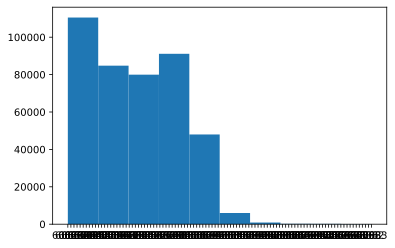

In [63]:
plt.hist(sixosix.code)
plt.show();

In [39]:
data.zipcode.fillna(0,inplace=True)
# data.zipcode.astype('int32')
# data.zipcode.sort_values(by=['zipcode'],ascending=True)
data.zipcode.astype('int32')

ValueError: invalid literal for int() with base 10: ' '

In [20]:
data[data.zipcode != '000000000'].zipcode.value_counts().tail(50)

601761833      1
605652745      1
606472443      1
620169746      1
608271639      1
600624421      1
605360000.0    1
606442523      1
600254341      1
606121722      1
600442158      1
606144067      1
604251474      1
50060          1
606511853      1
601151416      1
604193800      1
606131712      1
606441949      1
604093552      1
601533320      1
604611424      1
604221041      1
606561449      1
604474501      1
601261968      1
601376336      1
600468915      1
600771703      1
607072944      1
601335264      1
601034709.0    1
606301308      1
62987          1
600763872      1
606473532      1
606133713      1
600044606      1
606143651.0    1
606493609      1
601877425      1
615713153      1
605341942      1
600154432      1
606223149      1
31906          1
606232465      1
600772520.0    1
601032335      1
605421524      1
Name: zipcode, dtype: int64